In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

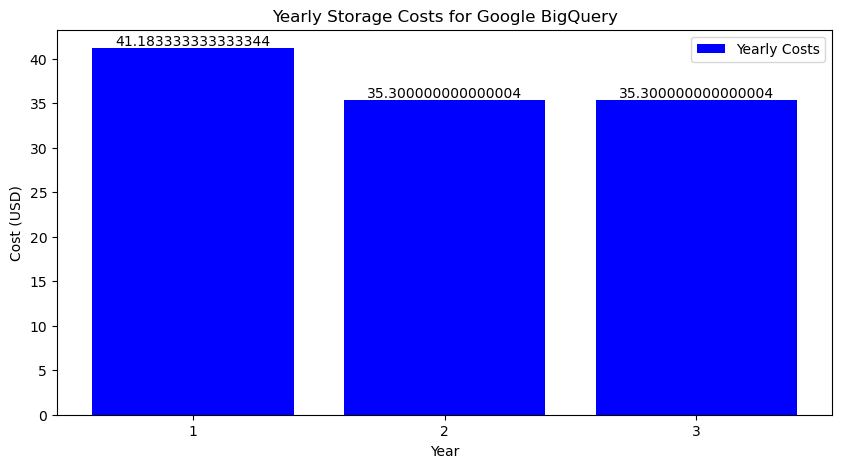

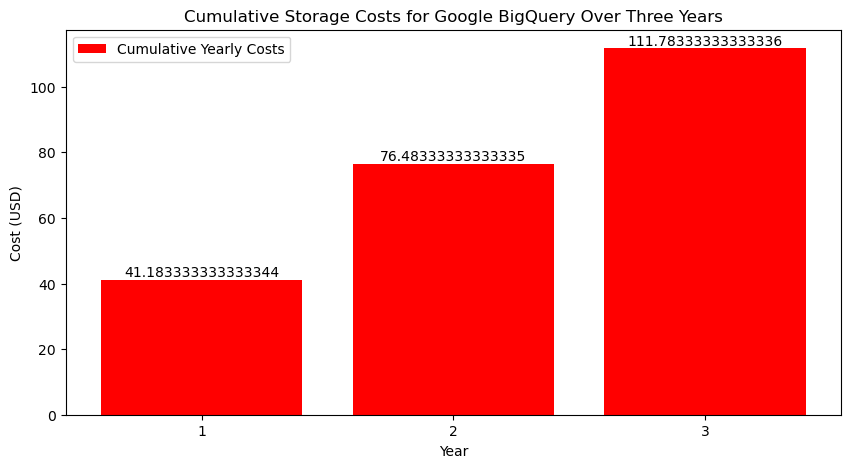

In [26]:
# Plotting the yearly costs
plt.figure(figsize=(10, 5))
plt.bar(range(1, years + 1), yearly_costs, color='blue', label='Yearly Costs')
plt.title('Yearly Storage Costs for Google BigQuery')
plt.xlabel('Year')
plt.ylabel('Cost (USD)')
plt.xticks(range(1, years + 1))

# Add labels to the bars
for i, cost in enumerate(yearly_costs):
    plt.text(i + 1, cost, str(cost), ha='center', va='bottom')

plt.legend()
plt.show()

# Plotting the cumulative yearly costs
plt.figure(figsize=(10, 5))
plt.bar(range(1, years + 1), cumulative_yearly_costs, color='red', label='Cumulative Yearly Costs')
plt.title('Cumulative Storage Costs for Google BigQuery Over Three Years')
plt.xlabel('Year')
plt.ylabel('Cost (USD)')
plt.xticks(range(1, years + 1))

# Add labels to the bars
for i, cost in enumerate(cumulative_yearly_costs):
    plt.text(i + 1, cost, str(cost), ha='center', va='bottom')

plt.legend()
plt.show()




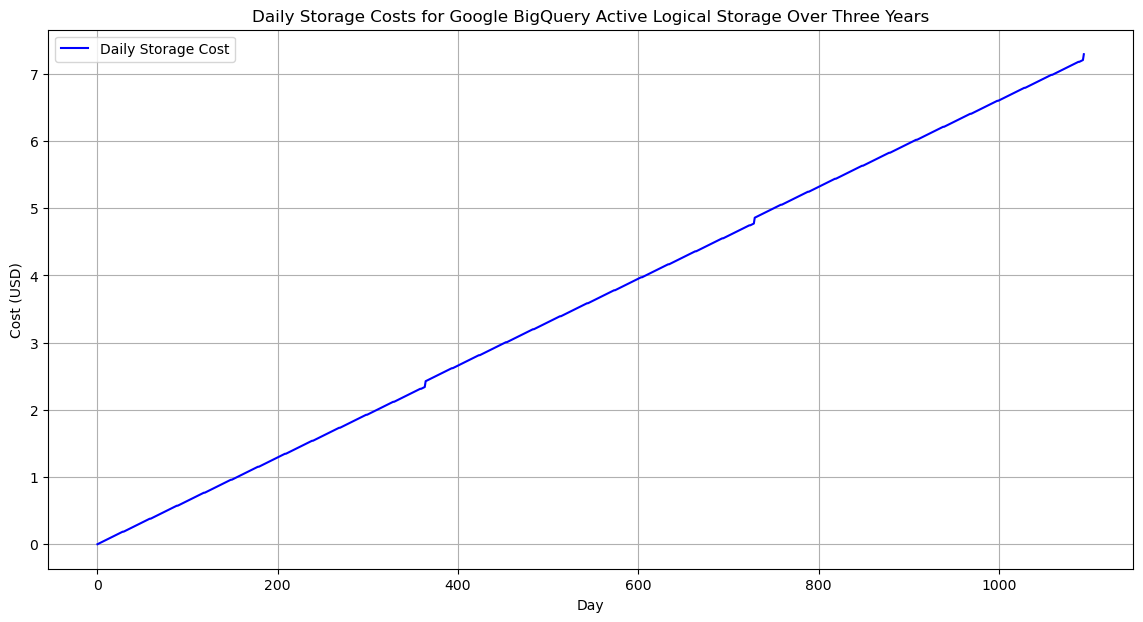

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants from the user's provided Google BigQuery pricing screenshot
daily_data_volume_gb = 10  # Daily data volume in GB
active_storage_cost_per_gb_per_month = 0.02  # Cost per GB per month for active storage
days_in_year = 365  # Number of days in a year
years = 3  # Total number of years
months_in_year = 12  # Number of months in a year
free_tier_gb_per_month = 10  # The first 10 GiB per month are free

# Initialize arrays to hold the daily costs and cumulative costs
daily_costs = np.zeros(days_in_year * years)
cumulative_costs = np.zeros(days_in_year * years)

# Calculate the daily and cumulative costs
for day in range(1, days_in_year * years + 1):
    month = (day % days_in_year) // (days_in_year // months_in_year) + 1
    total_gb = daily_data_volume_gb * day
    total_free_gb = free_tier_gb_per_month * month
    billable_gb = max(total_gb - total_free_gb, 0)
    daily_cost = billable_gb * active_storage_cost_per_gb_per_month / (days_in_year // months_in_year)
    daily_costs[day - 1] = daily_cost
    cumulative_costs[day - 1] = np.sum(daily_costs[:day])

# Plotting the daily costs
plt.figure(figsize=(14, 7))
plt.plot(daily_costs, label='Daily Storage Cost', color='blue')
plt.title('Daily Storage Costs for Google BigQuery Active Logical Storage Over Three Years')
plt.xlabel('Day')
plt.ylabel('Cost (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame for the Excel file
df_costs = pd.DataFrame({
    'Day': np.arange(1, days_in_year * years + 1),
    'Daily Cost (USD)': daily_costs,
    'Cumulative Cost (USD)': cumulative_costs
})


In [ ]:
now 